# Function to Approximate

In [1]:
%pip install -q matplotlib sympy numpy

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sympy

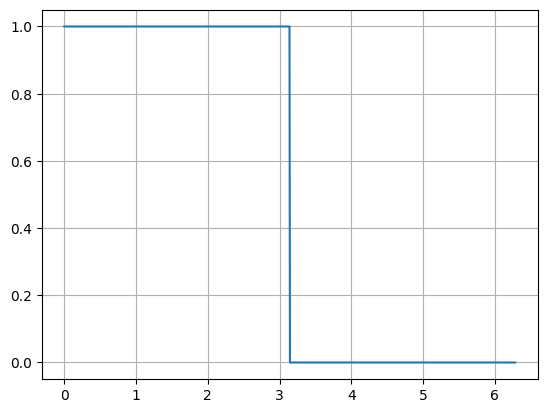

In [3]:
t = np.linspace(0, 2*np.pi, 1000)  # plotting to 4 pi to show effect of periodic extension
f = lambda t: np.where(t < np.pi, 1, 0)
plt.plot(t, f(t))
plt.grid()

In [4]:
def symbolic_sol():

    t = sympy.symbols('t')
    f = sympy.Piecewise((1, t < sympy.pi), (0, True))
    tau = 2*sympy.pi
    w0 = 2*sympy.pi/tau
    k = sympy.symbols('k', real=True, integer=True)
    psi_k = sympy.exp(-sympy.I*k*w0*t)
    ak = (sympy.integrate(f*sympy.conjugate(psi_k), (t, 0, tau))/tau).simplify()

    ak_odd = ak.subs(k, sympy.symbols('k', real=True, odd=True, integer=True)).simplify()
    ak_odd

    ak_even = ak.subs(k, sympy.symbols('k', real=True, even=True, integer=True))
    ak_even

    return (ak, ak_odd, ak_even)

ak, ak_odd, ak_even = symbolic_sol()
ak

Piecewise((I*(1 - (-1)**k)/(2*pi*k), (k > 0) | (k < 0)), (1/2, True))

In [5]:
ak_odd

Piecewise((I/(pi*k), (k > 0) | (k < 0)), (1/2, True))

In [6]:
ak_even

Piecewise((0, (k > 0) | (k < 0)), (1/2, True))

# Example with Complex Exponential Basis

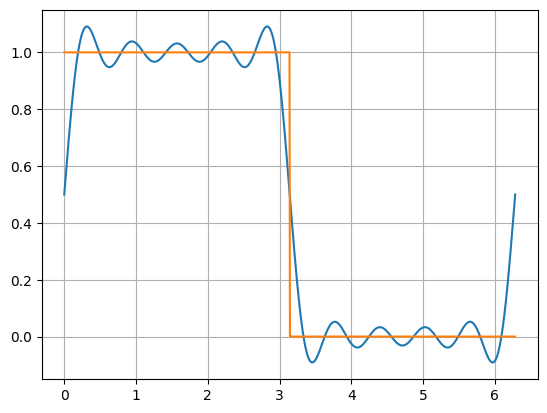

In [7]:
def plot_approx():
    n = 10
    tau = 2*np.pi
    t = np.linspace(0, tau, 1000)
    k_list = np.arange(0, n+1)
    ak_list = []
    p = 0
    a0 = 0
    w0 = 2*np.pi/tau

    approx = a0*1

    for k in range(-n, n+1):
        if k == 0:
            ak = 0.5
        elif k % 2 == 0:
            ak = 0
        else:
            ak = 1j/(np.pi*k)
        approx = approx + ak*np.exp(-1j*k*w0*t)
            
    approx = np.real(approx)
    plt.plot(t, approx)
    plt.plot(t, f(t))
    plt.grid()


plot_approx()

# Example with Sin/Cos Basis

In [8]:
def compute_alpha_beta(ak):
    k = sympy.symbols('k', real=True, integer=True)
    k_odd = sympy.symbols('k', real=True, positive=True, odd=True)
    k_even = sympy.symbols('k', real=True, positive=True, even=True)

    alpha_k = ((ak + sympy.conjugate(ak))).simplify()
    alpha_k_odd = alpha_k.subs(k, k_odd)
    alpha_k_even = alpha_k.subs(k, k_even)

    beta_k = (-sympy.I*(ak - sympy.conjugate(ak))).simplify()
    beta_k_odd = beta_k.subs(k, k_odd)
    beta_k_even = beta_k.subs(k, k_even)

    return locals()

res1 = compute_alpha_beta(ak)

In [9]:
res1['alpha_k']

Piecewise((0, (k > 0) | (k < 0)), (1, True))

In [10]:
res1['alpha_k_even']

0

In [11]:
res1['alpha_k_odd']

0

In [12]:
res1['beta_k']

Piecewise(((1 - (-1)**k)/(pi*k), (k > 0) | (k < 0)), (0, True))

In [13]:
res1['beta_k_even']

0

In [14]:
res1['beta_k_odd']

2/(pi*k)

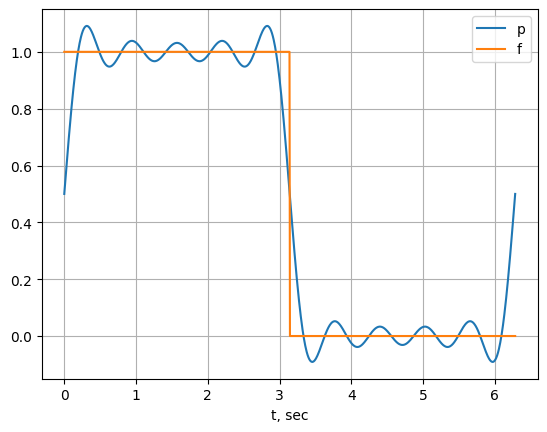

In [15]:
def plot_approx_sincos():
    n = 10
    tau = 2*np.pi
    w0 = 2*np.pi/tau
    k_list = np.arange(0, n+1)
    ak_list = []
    p = 0
    for k in k_list:
        if k == 0:
            ak = 0.5
            psi_k = 1
            p += ak*psi_k
        elif k % 2 == 1:
            alpha_k = 0
            beta_k = 2/(np.pi*k)
            p += alpha_k*np.cos(k*w0*t) + beta_k*np.sin(k*w0*t)
        else:
            alpha_k = 0
            beta_k = 0
            p += alpha_k*np.cos(k*w0*t) + beta_k*np.sin(k*w0*t)

        ak_list.append(ak)

    ak_list = np.array(ak_list)

    p = np.real(p)
    plt.plot(t, p, label='p')
    plt.plot(t, f(t), label='f')
    plt.grid()
    plt.xlabel('t, sec')
    plt.legend()

plot_approx_sincos()
